In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://docs.google.com/spreadsheets/d/1wrH9VMn3BB1t8Y5F7bmtC0z0-8QCRFRf/export?format=xlsx'
df = pd.read_excel(url)

In [30]:
df['JoinDate'] = pd.to_datetime(df['JoinDate'], dayfirst=True, errors='coerce')

df['Salary'] = pd.to_numeric(df['Salary'], errors='coerce')
df['PerformanceRating'] = pd.to_numeric(df['PerformanceRating'], errors='coerce')

df['Salary'] = df['Salary'].fillna(df['Salary'].median())
df['PerformanceRating'] = df['PerformanceRating'].fillna(df['PerformanceRating'].median())

df['Department'] = df['Department'].fillna(df['Department'].mode()[0])
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['JoinDate'] = df['JoinDate'].fillna(df['JoinDate'].mode()[0])

print("Cleaned Data (first 5 rows):")
print(df.head())
print("\n")

Cleaned Data (first 5 rows):
  EmployeeID              Name  Gender Department     Salary   JoinDate  \
0       E001   Dr. Lisa Rogers    Male  Marketing  108988.18 2021-11-13   
1       E002  Nichole Peterson  Female    Finance   31002.41 2015-07-02   
2       E003        Paul Blair  Female      Sales   73663.33 2023-05-04   
3       E004   Michelle Thomas   Other  Marketing   84044.55 2019-11-18   
4       E005      Jessica Berg  Female  Marketing   92527.68 2019-11-30   

   PerformanceRating  
0                  4  
1                  5  
2                  1  
3                  1  
4                  3  




In [31]:
df['Tenure'] = 2025 - df['JoinDate'].dt.year

def salary_category(salary):
    if salary < 50000:
        return 'Low'
    elif salary <= 90000:
        return 'Medium'
    else:
        return 'High'

df['SalaryCategory'] = df['Salary'].apply(salary_category)

print("Data with Tenure and SalaryCategory (first 5 rows):")
print(df[['Salary', 'Tenure', 'SalaryCategory']].head())
print("\n")

Data with Tenure and SalaryCategory (first 5 rows):
      Salary  Tenure SalaryCategory
0  108988.18       4           High
1   31002.41      10            Low
2   73663.33       2         Medium
3   84044.55       6         Medium
4   92527.68       6           High




In [32]:
avg_salary_by_dept = df.groupby('Department')['Salary'].mean().reset_index()
print("Average Salary by Department:")
print(avg_salary_by_dept)
print("\n")

gender_count_by_dept = df.groupby(['Department', 'Gender']).size().unstack(fill_value=0)
print("Gender Count by Department:")
print(gender_count_by_dept)
print("\n")

avg_rating_by_dept = df.groupby('Department')['PerformanceRating'].mean().reset_index()
print("Average Performance Rating by Department:")
print(avg_rating_by_dept)
print("\n")

low_performers = df[df['PerformanceRating'] <= 2]
print("Low Performers (Performance Rating ≤ 2):")
print(low_performers)
print("\n")

Average Salary by Department:
  Department        Salary
0    Finance  67804.804167
1         HR  79740.074286
2         IT  77536.544286
3  Marketing  79803.912500
4      Sales  69497.878333


Gender Count by Department:
Gender      Female  Male  Other
Department                     
Finance          4     6      2
HR               5     1      1
IT               4     2      1
Marketing        3     5      4
Sales            7     3      2


Average Performance Rating by Department:
  Department  PerformanceRating
0    Finance           2.416667
1         HR           3.142857
2         IT           3.714286
3  Marketing           3.166667
4      Sales           2.916667


Low Performers (Performance Rating ≤ 2):
   EmployeeID               Name  Gender Department     Salary   JoinDate  \
2        E003         Paul Blair  Female      Sales   73663.33 2023-05-04   
3        E004    Michelle Thomas   Other  Marketing   84044.55 2019-11-18   
12       E013        Louis Hicks    Male    

In [33]:
with pd.ExcelWriter('employee_analysis_result.xlsx') as writer:
    df.to_excel(writer, sheet_name='Cleaned_Data', index=False)
    avg_salary_by_dept.to_excel(writer, sheet_name='Avg_Salary_By_Dept', index=False)
    gender_count_by_dept.to_excel(writer, sheet_name='Gender_Count_By_Dept')
    avg_rating_by_dept.to_excel(writer, sheet_name='Avg_Rating_By_Dept', index=False)
    low_performers.to_excel(writer, sheet_name='Low_Performers', index=False)

print("All results have been saved to 'employee_analysis_result.xlsx'.")
print("\n")

All results have been saved to 'employee_analysis_result.xlsx'.




<Figure size 800x500 with 0 Axes>

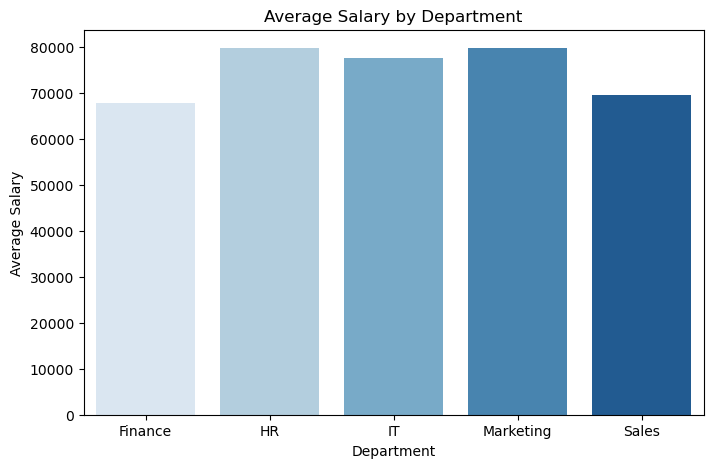

In [36]:
plt.figure(figsize=(8,5))
plt.figure(figsize=(8,5))
sns.barplot(x='Department', y='Salary', data=avg_salary_by_dept, hue='Department', palette='Blues', legend=False)
plt.title('Average Salary by Department')
plt.xlabel('Department')
plt.ylabel('Average Salary')
plt.show()



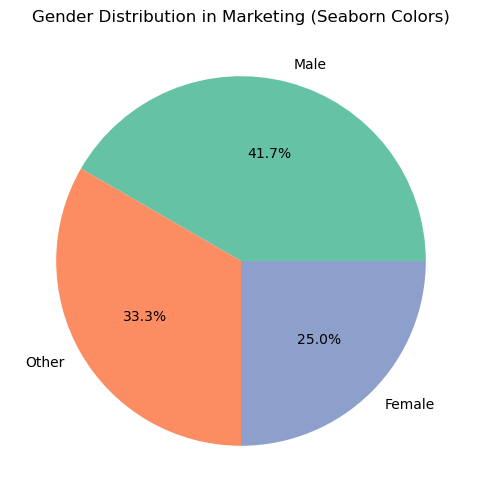

In [35]:
gender_counts = marketing['Gender'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.title('Gender Distribution in Marketing (Seaborn Colors)')
plt.show()